<h1 style="color: purple; text-align: center;">Market Basket Analysis</h1>



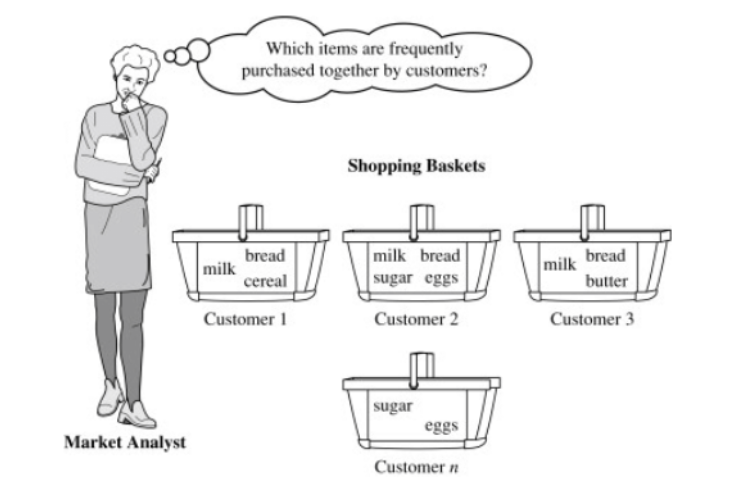

# <span style="color:red ;text-align: center;">Introduction:</span>
### Imagine you are helping the owner of your local shop understand what items customers love to buy together. By finding out these favorite item combinations, the shop can make sure they always have these items in stock and maybe even offer special deals! This project is called "Market Basket Analysis," and it helps businesses like our local shop learn about the buying habits of their customers.

### Key Points:
- **Market Basket Analysis:** A data mining technique used to discover relationships between items.
- **Algorithms Used:** Apriori Algorithm and Association Rules.
- **Purpose:** To find frequent itemsets and generate rules that explain the relationships between items.
- **Applications:** Helps in inventory management, promotions, and layout planning.

# <span style="color:red">Problem Statement:</span>
### You have been given a list of transactions from your local shop. Each transaction shows which items were bought together. Your task is to analyze this list and find out which items are most often bought together. This information will help the shop owner decide which items to place next to each other on the shelves and what special offers to create.

## Step 1: Import Libraries and Read Data


In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

### Read the data from the CSV file

In [21]:
df = pd.read_csv("Market_analysis.csv")

### Display the first few rows of the dataframe

In [5]:
print("First few rows of the dataframe:")
print(df.head())

First few rows of the dataframe:
   TransactionID                    Items
0              1          Milk,Bread,Eggs
1              2   Milk,Diapers,Beer,Eggs
2              3  Milk,Bread,Diapers,Beer
3              4  Bread,Diapers,Beer,Eggs
4              5  Milk,Bread,Diapers,Eggs


## Step 2: Data Preprocessing

## In this step, we convert the items in each transaction to a list format for easier manipulation.

In [6]:
df['Items'] = df['Items'].apply(lambda x: x.split(','))

In [7]:
# Display the dataframe after splitting the items
print("\nDataframe after splitting items:")
print(df.head())


Dataframe after splitting items:
   TransactionID                         Items
0              1           [Milk, Bread, Eggs]
1              2   [Milk, Diapers, Beer, Eggs]
2              3  [Milk, Bread, Diapers, Beer]
3              4  [Bread, Diapers, Beer, Eggs]
4              5  [Milk, Bread, Diapers, Eggs]


## Step 3: Convert transactions to a one-hot encoded dataframe

## Here  each item in a transaction is represented by a binary value. You can see below example

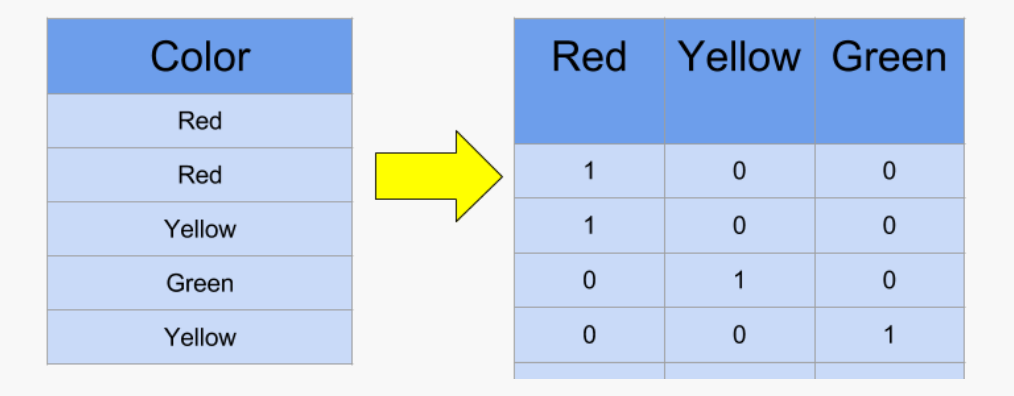

### Create a list of all unique items


In [8]:
all_items = list(set(item for sublist in df['Items'] for item in sublist))

### Initialize the one-hot encoded dataframe

In [9]:
encoded_df = pd.DataFrame(0, index=df.index, columns=all_items)

## Example
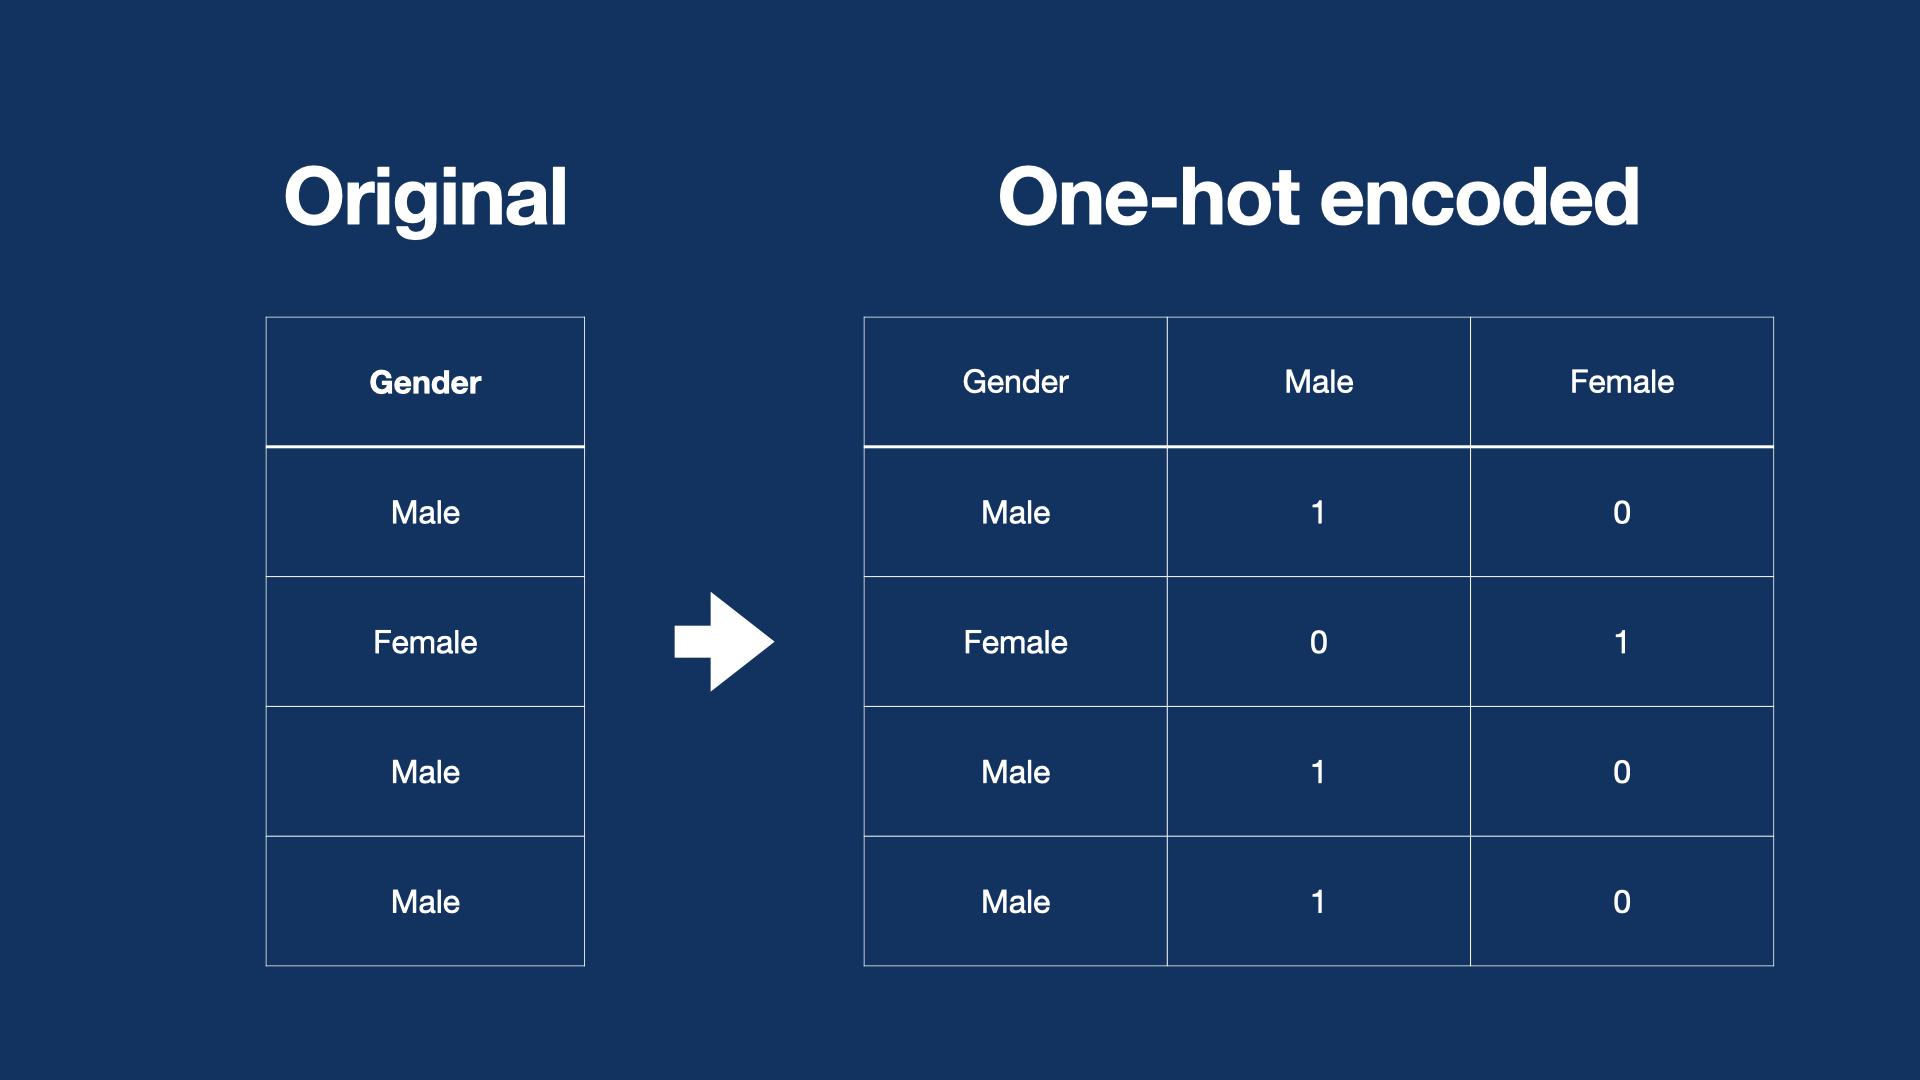

### Encode the transactions

In [10]:
for index, transaction in enumerate(df['Items']):
    for item in transaction:
        encoded_df.at[index, item] = 1

# Display the one-hot encoded dataframe
print("\nOne-hot encoded dataframe:")
print(encoded_df.head())


One-hot encoded dataframe:
   Eggs  Butter  Beer  Bread  Diapers  Milk
0     1       0     0      1        0     1
1     1       0     1      0        1     1
2     0       0     1      1        1     1
3     1       0     1      1        1     0
4     1       0     0      1        1     1


###  Apriori Algorithm
### The Apriori Algorithm finds common item combinations in a dataset by identifying frequently bought items together and creating rules from those combinations.

### Association Rules
### Association Rules are the results of the Apriori Algorithm, showing relationships between items, like "If a customer buys milk, they are likely to buy bread."

## Step 4: Apply the Apriori algorithm to find frequent itemsets

In [11]:
frequent_itemsets = apriori(encoded_df, min_support=0.1, use_colnames=True)

# Display the frequent itemsets
print("\nFrequent itemsets:")
print(frequent_itemsets.head())


Frequent itemsets:
    support   itemsets
0  0.560000     (Eggs)
1  0.326667   (Butter)
2  0.340000     (Beer)
3  0.606667    (Bread)
4  0.480000  (Diapers)


C:\Users\MADHAVI\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Summary:

Support tells us how common a rule is.
Confidence tells us how often one thing happens when another thing happens.
Lift tells us if two things are likely to happen together more than we would expect by chance.
These explanations use relatable examples to make the concepts easier to understand for younger 

<h1 style="color:purple; text-align:center;">Understanding Support, Confidence, and Lift</h1>

<h2 style="color:red;">Summary</h2>

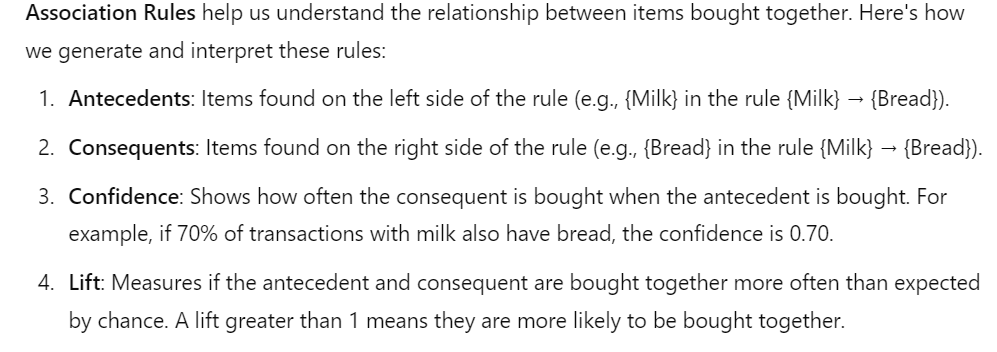


## Step 5: Generate association rules

In [12]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display the association rules
print("\nAssociation rules:")
print(rules.head())



Association rules:
  antecedents consequents  antecedent support  consequent support   support  \
0      (Eggs)     (Bread)            0.560000            0.606667  0.346667   
1     (Bread)      (Eggs)            0.606667            0.560000  0.346667   
2    (Butter)     (Bread)            0.326667            0.606667  0.253333   
3     (Bread)    (Butter)            0.606667            0.326667  0.253333   
4   (Diapers)      (Beer)            0.480000            0.340000  0.200000   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.619048  1.020408  0.006933    1.032500       0.045455  
1    0.571429  1.020408  0.006933    1.026667       0.050847  
2    0.775510  1.278314  0.055156    1.752121       0.323345  
3    0.417582  1.278314  0.055156    1.156101       0.553524  
4    0.416667  1.225490  0.036800    1.131429       0.353846  


## Step 6: Get recommendations based on the association rules

In [13]:
def get_recommendations(rules, item):
    """
    Get recommendations based on the association rules.
    """
    recommendations = rules[rules['antecedents'].apply(lambda x: item in x)]
    return recommendations

In [14]:
# Get recommendations for 'Milk'
recommendations_for_milk = get_recommendations(rules, 'Milk')

# Display the recommendations
print("\nRecommendations for 'Milk':")
print(recommendations_for_milk[['antecedents', 'consequents', 'confidence', 'lift']])


Recommendations for 'Milk':
        antecedents consequents  confidence      lift
6            (Milk)      (Beer)    0.395349  1.162791
18  (Diapers, Milk)      (Beer)    0.421053  1.238390


## Specific Recommendations


In [15]:
print("\nSpecific Recommendations for the Shop Owner:")
print("1. Place 'Milk' and 'Bread' next to each other.")
print("2. Offer a discount when buying 'Butter ' and 'Bread' together.")



Specific Recommendations for the Shop Owner:
1. Place 'Milk' and 'Bread' next to each other.
2. Offer a discount when buying 'Butter ' and 'Bread' together.


##  Step 7: Visualize the results

## First Graph: Support of Frequent Itemsets
- **What it shows**: How often groups of items are bought together.
- **Example**: Imagine we are looking at a store, and the graph shows that "milk and bread" are bought together by 40% of customers. The taller the bar, the more common that group of items is.
- **In short**: It tells us which item combinations (like "milk and bread") are popular.

## Second Graph: Lift of Association Rules
- **What it shows**: How strong the connection is between items. It tells us if buying one item makes it more likely that someone will also buy another.
- **Example**: If you buy "milk," the graph shows how likely you are to also buy "bread." A high bar means that if someone buys milk, they are very likely to also buy bread.
- **In short**: It tells us if buying one item makes it more likely that someone will buy another.

## Difference:
- **Support** (first graph) is about how often items are bought together.
- **Lift** (second graph) is about how strong the link is between buying one item and buying another.


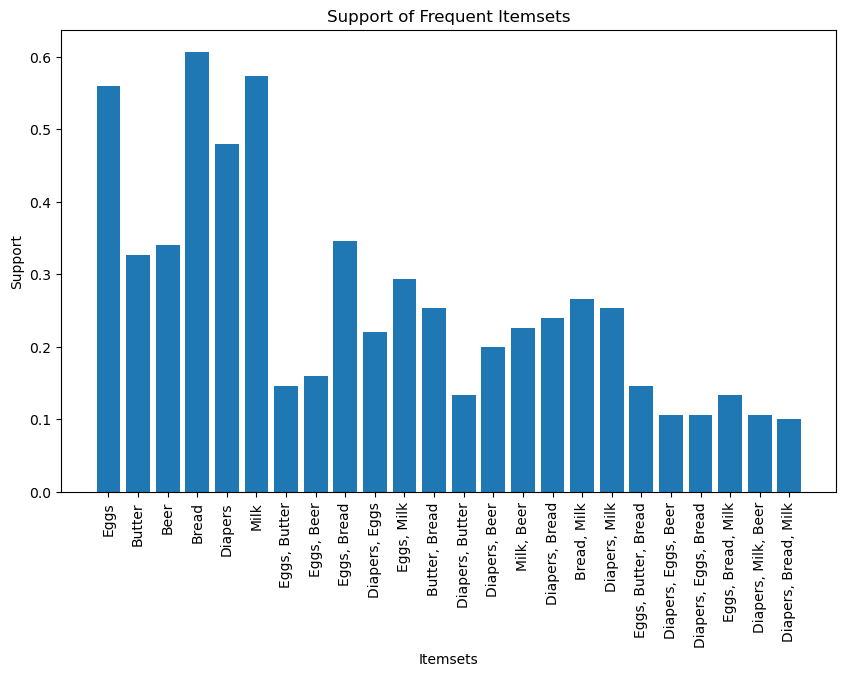

In [16]:
# Plot the support of frequent itemsets
plt.figure(figsize=(10, 6))
plt.bar(frequent_itemsets['itemsets'].apply(lambda x: ', '.join(list(x))), frequent_itemsets['support'])
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.title('Support of Frequent Itemsets')
plt.xticks(rotation=90)
plt.show()

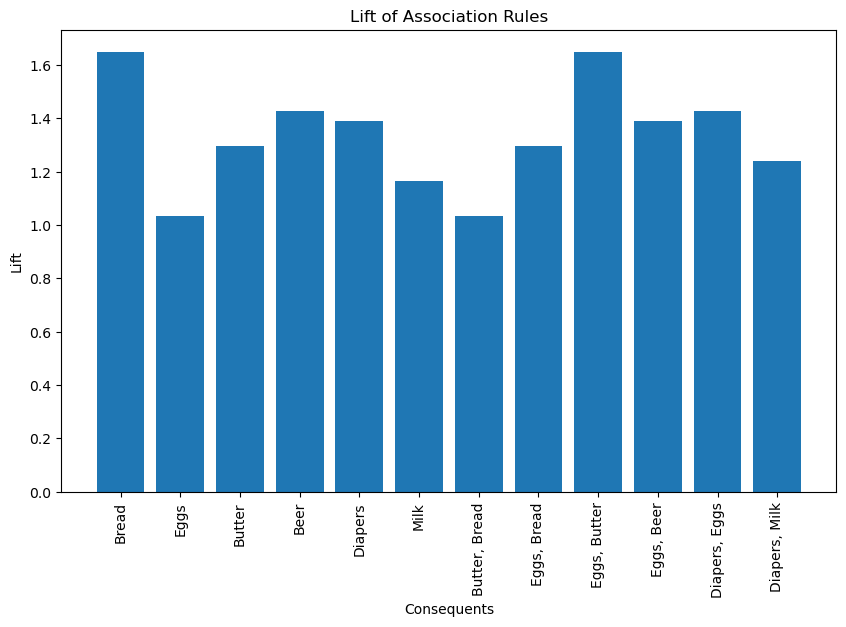

In [17]:
# Plot the lift of the association rules
plt.figure(figsize=(10, 6))
plt.bar(rules['consequents'].apply(lambda x: ', '.join(list(x))), rules['lift'])
plt.xlabel('Consequents')
plt.ylabel('Lift')
plt.title('Lift of Association Rules')
plt.xticks(rotation=90)
plt.show()

## Summary and Recommendations

### Summary:
- We found which items are frequently purchased together and created rules showing how items are related.
- The **confidence** tells us the likelihood of buying one item when another is bought.
- The **lift** measures how much more likely items are to be bought together compared to random chance.

### Recommendations:
1. **Product Placement**: Place items that frequently appear together next to each other. For example, if milk and bread are often bought together, position them close to each other in the store.
2. **Promotions**: Offer discounts or bundle deals for items that are commonly bought together. For instance, provide a discount for buying milk and bread together to attract more customers.

These actions can help improve sales and enhance customer satisfaction by making## Summary and Recommendations

### Summary:
- 🛒 **Frequent Itemsets**: We identified which items are often bought together and created rules to show these relationships.
- 📊 **Confidence**: This tells us the likelihood of buying one item when another is purchased. For example, if buying milk makes it more likely to buy bread, that’s what confidence measures.
- 🔍 **Lift**: This shows how much more likely items are to be bought together compared to random chance. A higher lift means a stronger relationship between items.

### Recommendations:
1. **🛍️ Product Placement**: Arrange items that frequently appear together next to each other. For instance, if milk and bread are commonly bought together, place them close to each other in the store to make it easier for customers to find and purchase both.
   
2. **🎁 Promotions**: Create special offers or discounts for items that are often bought together. For example, offer a discount when customers buy both milk and bread together. This can attract more customers and increase sales.

These strategies can boost sales and enhance customer satisfaction by making shopping more convenient and appealing. 🌟
 shopping easier and more convenient.
